# Lanzini--Numerical Simulation Laboratory-- Exercise 02
## Exercise 02.1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit


- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Text(0, 0.5, 'Integral value Standard Deviation')

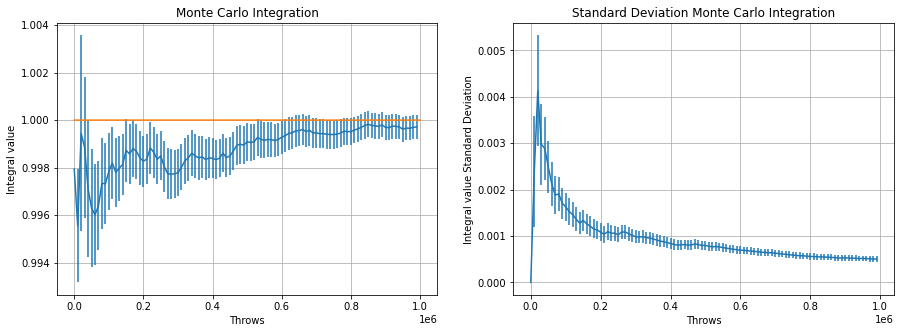

In [2]:
# Metodo della media per il calcolo dell'integrale

f1=open("Metodo_Media.txt", "r")
f2=open("Devstd_Media.txt", "r")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
Theoretical_value=np.array([
    1
    for x in np.linspace(0, 1000000, 1000000)
])
Throws, Results, uncertainty_av = np.loadtxt("Metodo_Media.txt", usecols=(0, 1, 2),  delimiter=' ', unpack='true')
ax1.errorbar(Throws, Results, uncertainty_av)
ax1.plot(Theoretical_value)
ax1.grid(True)
ax1.set_title("Monte Carlo Integration")
ax1.set_xlabel("Throws")
ax1.set_ylabel("Integral value")

Throws, Results, uncertainty_st = np.loadtxt("Devstd_Media.txt", usecols=(0, 1, 2),  delimiter=' ', unpack='true')
ax2.errorbar(Throws, Results, uncertainty_st)
ax2.grid(True)
ax2.set_title("Standard Deviation Monte Carlo Integration")
ax2.set_xlabel("Throws")
ax2.set_ylabel("Integral value Standard Deviation")


### Importance Sampling

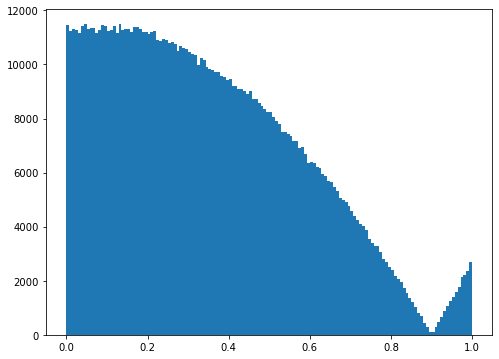

In [3]:
f3=open("Sampling.txt", "r")

Sampling = np.loadtxt("Sampling.txt")
plt.figure(figsize=(8, 6))
plt.hist(Sampling, bins='auto')
plt.show()

To do importance sampling, I sampled the modulus of the function expanded in series to the 2nd order.

Text(0, 0.5, 'Integral value Standard Deviation')

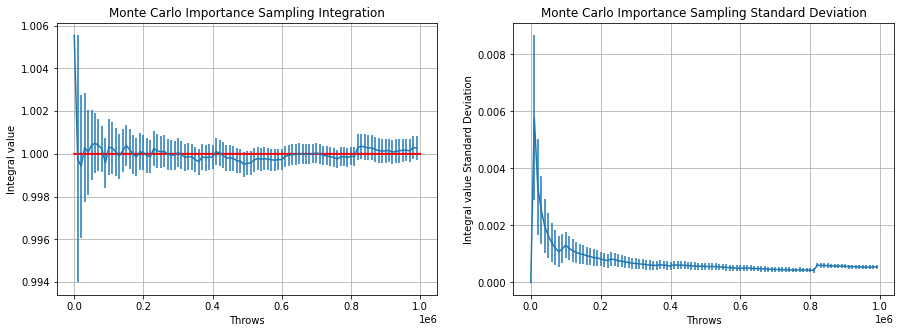

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

f4=open("Sampling_Method.txt", "r")
f5=open("Devstd_I_S.txt", "r")

Throws, Results, uncertainty_av2 = np.loadtxt("Sampling_Method.txt", usecols=(0, 1, 2),  delimiter=' ', unpack='true')
ax1.errorbar(Throws, Results, uncertainty_av2)
ax1.plot(Theoretical_value, color='Red', linewidth=2)
ax1.grid(True)
ax1.set_title("Monte Carlo Importance Sampling Integration")
ax1.set_xlabel("Throws")
ax1.set_ylabel("Integral value")

Throws, Results, uncertainty_st = np.loadtxt("Devstd_I_S.txt", usecols=(0, 1, 2),  delimiter=' ', unpack='true')
ax2.errorbar(Throws, Results, uncertainty_st)
ax2.grid(True)
ax2.set_title("Monte Carlo Importance Sampling Standard Deviation")
ax2.set_xlabel("Throws")
ax2.set_ylabel("Integral value Standard Deviation")


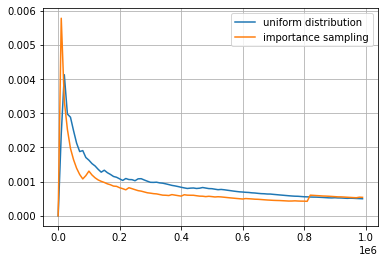

In [5]:
# comparing uncertainties

plt.plot(Throws, uncertainty_av, label='uniform distribution')
plt.plot(Throws, uncertainty_av2, label='importance sampling')
plt.legend()
plt.grid(True)
plt.show()

With importance sampling statistical uncertainty is generally lower (or almost equal) than It is without it.

## Exercise 02.2



- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

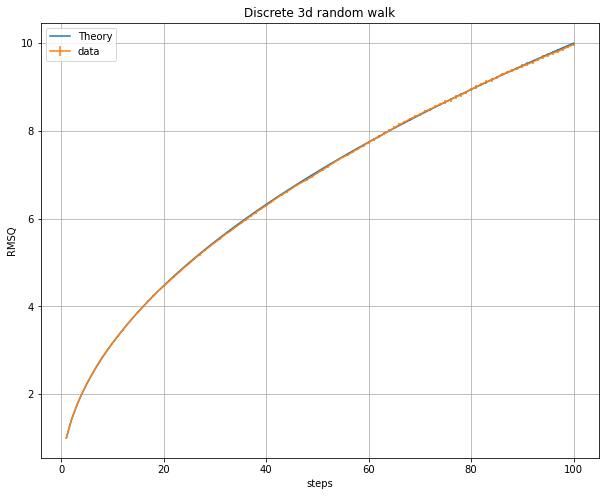

In [6]:
f6=open("RMSQ.txt")
f7=open("RMSQC.txt")
steps, rmsq, error=np.loadtxt("RMSQ.txt", usecols=(0, 1, 2), delimiter=' ', unpack=True)
theory=np.array([
    np.sqrt(x)
    for x in steps
])
plt.figure(figsize=(10, 8))
plt.plot(steps, theory, label="Theory")
plt.errorbar(steps, rmsq, error, label="data")
plt.xlabel("steps")
plt.ylabel("RMSQ")
plt.title("Discrete 3d random walk")
plt.legend()
plt.grid(True)
plt.show()

0.9986872505920751 0.0023018548209972067


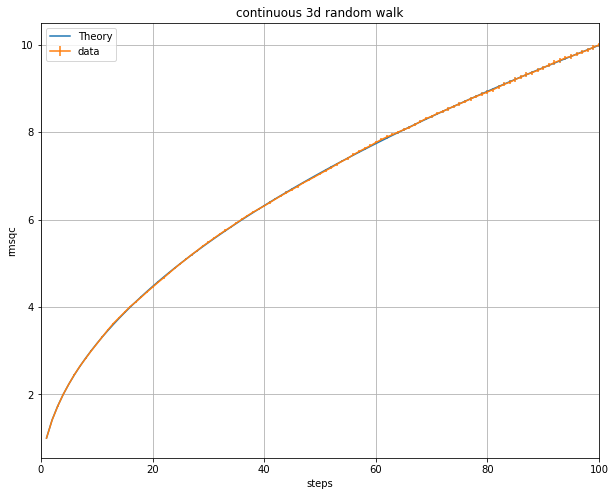

In [7]:
steps, rmsqc, error=np.loadtxt("RMSQC.txt", usecols=(0, 1,2 ), delimiter=' ', unpack=True)

def sqrt(x, N, a):
    return N*np.sqrt(x)+a

popt, _ = curve_fit(sqrt, steps, rmsqc)
theory=np.array([
    sqrt(x, *popt)
    for x in steps
])
plt.figure(figsize=(10, 8))
plt.plot(steps, theory, label="Theory")
plt.errorbar(steps, rmsqc, error, label="data")
plt.xlim([0, 100])
plt.grid(True)
plt.xlabel("steps")
plt.ylabel("rmsqc")
plt.legend()
plt.title("continuous 3d random walk")
print(*popt)
plt.show()
#logaritmica

Both results show a diffusive behaviour:
$$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} \propto \sqrt{N}$$
Here the proportionality constant is near 1.